In [ ]:
!pip install neuralforecast
!pip install feature-engine

In [ ]:
import sys
import joblib
import pandas as pd
import numpy as np
from time import time
from neuralforecast import NeuralForecast
from neuralforecast.models import NHITS, LSTM, MLP, NBEATSx, TCN, GRU
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import sklearn
import neuralforecast
import feature_engine

In [ ]:
# Versões
print('Versões:')
print('Python: %s' % sys.version)
print('Pandas: %s' % pd.__version__)
print('Numpy: %s' % np.__version__)
print('Sklearn: %s' % sklearn.__version__)
print('NeuralForecast: %s' % neuralforecast.__version__)
print('Feature-Engine: %s' % feature_engine.__version__)

Versões:
Python: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
Pandas: 2.2.2
Numpy: 2.0.2
Sklearn: 1.6.1
NeuralForecast: 3.0.1
Feature-Engine: 1.8.3


In [ ]:
ROOT = "/content/drive/MyDrive/dl-project"

FEATURES = [
    'pressure_1',
    'pressure_2',
    'pressure_3',
    'pressure_4',
    'pressure_5',
    'pressure_6',
    'pressure_7'
]
SEED = 78

horizon = 187
input_size = 187

In [ ]:
scaler = joblib.load(f"{ROOT}/data/scaler.joblib")

train = pd.read_csv(f"{ROOT}/data/train_data_scaled.csv")
test = pd.read_csv(f"{ROOT}/data/test_data_scaled.csv")

In [ ]:
# Exigência do nixtla
train['unique_id'] = 'slug_flow'
train['ds'] = train['time']
train['y'] = train['liquid_flow_rate']


test['unique_id'] = 'slug_flow'
test['ds'] = test['time']
test['y'] = test['liquid_flow_rate']

In [ ]:
nhits_model = NHITS(
    h=horizon,
    input_size=input_size,
    hist_exog_list=FEATURES,
    exclude_insample_y=True,
    n_blocks=[1, 1, 1],
    mlp_units=[[512, 512], [512, 512], [512, 512]],
    n_pool_kernel_size=[2, 2, 1],
    n_freq_downsample=[4, 2, 1],
    max_steps=500,
    val_check_steps=50,
    early_stop_patience_steps=5,
    random_seed=SEED
)

lstm_model = LSTM(
    h=horizon,
    input_size=input_size,
    hist_exog_list=FEATURES,
    exclude_insample_y=True,
    encoder_hidden_size=10,
    encoder_n_layers=3,
    max_steps=500,
    val_check_steps=50,
    early_stop_patience_steps=5,
    random_seed=SEED
)

mlp_model = MLP(
    h=horizon,
    input_size=input_size,
    hist_exog_list=FEATURES,
    exclude_insample_y=True,
    max_steps=500,
    val_check_steps=50,
    early_stop_patience_steps=5,
    random_seed=SEED
)

nbeats_model = NBEATSx(
    h=horizon,
    input_size=input_size,
    hist_exog_list=FEATURES,
    exclude_insample_y=True,
    n_blocks=[1, 1, 1],
    mlp_units=[[512, 512], [512, 512], [512, 512]],
    max_steps=500,
    val_check_steps=50,
    early_stop_patience_steps=5,
    random_seed=SEED
)

tcn_model = TCN(
    h=horizon,
    input_size=input_size,
    hist_exog_list=FEATURES,
    exclude_insample_y=True,
    max_steps=500,
    val_check_steps=50,
    early_stop_patience_steps=5,
    random_seed=SEED
)

gru_model = GRU(
    h=horizon,
    input_size=input_size,
    hist_exog_list=FEATURES,
    exclude_insample_y=True,
    max_steps=500,
    val_check_steps=50,
    early_stop_patience_steps=5,
    random_seed=SEED
)


models = [
    nhits_model,
    lstm_model,
    mlp_model,
    nbeats_model,
    tcn_model,
    gru_model
]

INFO:lightning_fabric.utilities.seed:Seed set to 78
INFO:lightning_fabric.utilities.seed:Seed set to 78
INFO:lightning_fabric.utilities.seed:Seed set to 78
INFO:lightning_fabric.utilities.seed:Seed set to 78
INFO:lightning_fabric.utilities.seed:Seed set to 78
INFO:lightning_fabric.utilities.seed:Seed set to 78


In [ ]:
nf = NeuralForecast(
    models=models,
    freq=1
)

nf.fit(
    df=train, val_size=horizon
)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 4.4 M  | train
-------------------------------------------------------
4.4 M     Trainable params
0         Non-trainable params
4.4 M     Total params
17.426    Total estimated model params size (MB)
34        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=500` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | hist_encoder | LSTM          | 2.6 K  | train
4 | mlp_decoder  | MLP           | 1.5 K  | train
-------------------------------------------------------
4.1 K     Trainable params
0         Non-trainable params
4.1 K     Total params
0.016     Total estimated model params s

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=500` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | mlp          | ModuleList    | 2.6 M  | train
4 | out          | Linear        | 191 K  | train
-------------------------------------------------------
2.8 M     Trainable params
0         Non-trainable params
2.8 M     Total params
11.097    Total estimated model params s

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=500` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 5.4 M  | train
-------------------------------------------------------
5.2 M     Trainable params
140 K     Non-trainable params
5.4 M     Total params
21.521    Total estimated model params size (MB)
31        Modules in train mode
0        

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=500` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type                       | Params | Mode 
-----------------------------------------------------------------------
0 | loss            | MAE                        | 0      | train
1 | padder_train    | ConstantPad1d              | 0      | train
2 | scaler          | TemporalNorm               | 0      | train
3 | hist_encoder    | TemporalConvolutionEncoder | 133 K  | train
4 | context_adapter | Linear                     | 35.2 K | train
5 | mlp_decoder     | MLP                        | 16.6 K | train

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=500` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | hist_encoder | GRU           | 367 K  | train
4 | mlp_decoder  | MLP           | 25.9 K | train
-------------------------------------------------------
393 K     Trainable params
0         Non-trainable params
393 K     Total params
1.572     Total estimated model params s

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=500` reached.


In [ ]:
# Junta os últimos 'input_size' pontos do treino com os dados de teste
predictions_input_df = pd.concat([train.tail(input_size), test])

In [ ]:
# Cria janelas deslizantes do DataFrame para fazer predições
inputs_for_predicions_list = [
    predictions_input_df.iloc[i:i + input_size]
    for i in range(0, len(predictions_input_df) - input_size + 1, horizon)
]

In [ ]:
forecasts_list = []
for input_df in inputs_for_predicions_list:
    forecast = nf.predict(df=input_df)
    forecasts_list.append(forecast)

In [ ]:
forecasts_output = pd.concat(forecasts_list)

In [ ]:
forecasts_output

,unique_id,ds,NHITS,LSTM,MLP,NBEATSx,TCN,GRU
0,slug_flow,1501,0.461424,0.300320,0.440501,0.464201,0.439228,0.313994
1,slug_flow,1502,0.470799,0.329272,0.461745,0.475175,0.447401,0.383377
2,slug_flow,1503,0.483021,0.370722,0.479539,0.490088,0.467573,0.473527
3,slug_flow,1504,0.502172,0.407761,0.498264,0.504894,0.464768,0.513023
4,slug_flow,1505,0.512578,0.439136,0.527113,0.518282,0.488674,0.525314
...,...,...,...,...,...,...,...,...
182,slug_flow,3179,0.278491,0.276741,0.283005,0.273606,0.292146,0.276780
183,slug_flow,3180,0.273986,0.276769,0.288038,0.276662,0.277485,0.276824
184,slug_flow,3181,0.273898,0.276800,0.286837,0.277730,0.293098,0.276864
185,slug_flow,3182,0.276785,0.276832,0.291991,0.275278,0.292849,0.276898


In [ ]:
ground_truth = test[['unique_id', 'ds', 'y']]
ground_truth

,unique_id,ds,y
0,slug_flow,1501,0.459397
1,slug_flow,1502,0.471283
2,slug_flow,1503,0.484231
3,slug_flow,1504,0.496564
4,slug_flow,1505,0.510421
...,...,...,...
1495,slug_flow,2996,0.279759
1496,slug_flow,2997,0.279714
1497,slug_flow,2998,0.279125
1498,slug_flow,2999,0.278436


In [ ]:
exogenous_results = pd.merge(
    ground_truth,
    forecasts_output,
    on=['unique_id', 'ds'],
    how='left'
)
exogenous_results

,unique_id,ds,y,NHITS,LSTM,MLP,NBEATSx,TCN,GRU
0,slug_flow,1501,0.459397,0.461424,0.300320,0.440501,0.464201,0.439228,0.313994
1,slug_flow,1502,0.471283,0.470799,0.329272,0.461745,0.475175,0.447401,0.383377
2,slug_flow,1503,0.484231,0.483021,0.370722,0.479539,0.490088,0.467573,0.473527
3,slug_flow,1504,0.496564,0.502172,0.407761,0.498264,0.504894,0.464768,0.513023
4,slug_flow,1505,0.510421,0.512578,0.439136,0.527113,0.518282,0.488674,0.525314
...,...,...,...,...,...,...,...,...,...
1495,slug_flow,2996,0.279759,0.282709,0.279067,0.289090,0.285358,0.278900,0.279571
1496,slug_flow,2997,0.279714,0.279489,0.285690,0.285701,0.280866,0.289902,0.274891
1497,slug_flow,2998,0.279125,0.279221,0.271572,0.280640,0.277625,0.288156,0.277694
1498,slug_flow,2999,0.278436,0.279391,0.273965,0.291294,0.281359,0.284193,0.279314


In [ ]:
file_name = "ExogenousCaseModels"
version = "v1"
exogenous_results.to_csv(f"{ROOT}/results/{file_name}_{version}.csv", index=False, mode='x')

In [ ]:
exogenous_results = pd.read_csv(f"{ROOT}/results/{file_name}_{version}.csv")

In [ ]:
##################################
# Retornar para a escala original
##################################

In [ ]:
n_rows = len(exogenous_results)
dummy_df = pd.DataFrame(
    data={
        'pressure_1': [0]*n_rows,
        'pressure_2': [0]*n_rows,
        'pressure_3': [0]*n_rows,
        'pressure_4': [0]*n_rows,
        'pressure_5': [0]*n_rows,
        'pressure_6': [0]*n_rows,
        'pressure_7': [0]*n_rows,
        'gas_flow_rate': [0]*n_rows,
        'liquid_flow_rate': [0]*n_rows
    }
)

In [ ]:
model_outputs_columns = [
    'y', # y_true
    'NHITS',
    'LSTM',
    'MLP',
    'NBEATSx',
    'TCN',
    'GRU'
]

In [ ]:
original_scale_predictons = {}
for column in model_outputs_columns:
    dummy_df['liquid_flow_rate'] = exogenous_results[column]
    reverse_df = scaler.inverse_transform(dummy_df)
    original_scale_predictons[column] = reverse_df['liquid_flow_rate']

In [ ]:
original_scale_df = pd.concat(
    [
        exogenous_results[['unique_id', 'ds']],
        pd.DataFrame(original_scale_predictons)
    ],
    axis=1
)

original_scale_df

,unique_id,ds,y,NHITS,LSTM,MLP,NBEATSx,TCN,GRU
0,slug_flow,1501,91.592333,92.369738,30.596746,84.346907,93.434619,83.858765,35.839834
1,slug_flow,1502,96.149750,95.964240,41.698195,92.492571,97.642213,86.992947,62.443662
2,slug_flow,1503,101.114667,100.650521,57.591473,99.315572,103.360510,94.727474,97.010379
3,slug_flow,1504,105.843333,107.993819,71.793481,106.495474,109.037449,93.651953,112.154576
4,slug_flow,1505,111.156667,111.983768,83.823635,117.556969,114.170917,102.818131,116.867421
...,...,...,...,...,...,...,...,...,...
1495,slug_flow,2996,22.713000,23.844220,22.447860,26.290962,24.860074,22.383731,22.641073
1496,slug_flow,2997,22.696038,22.609547,24.987068,24.991539,23.137420,26.602360,20.846655
1497,slug_flow,2998,22.470111,22.506787,19.573911,23.050887,21.894918,25.932731,21.921340
1498,slug_flow,2999,22.205667,22.572039,20.491649,27.135985,23.326726,24.413424,22.542350


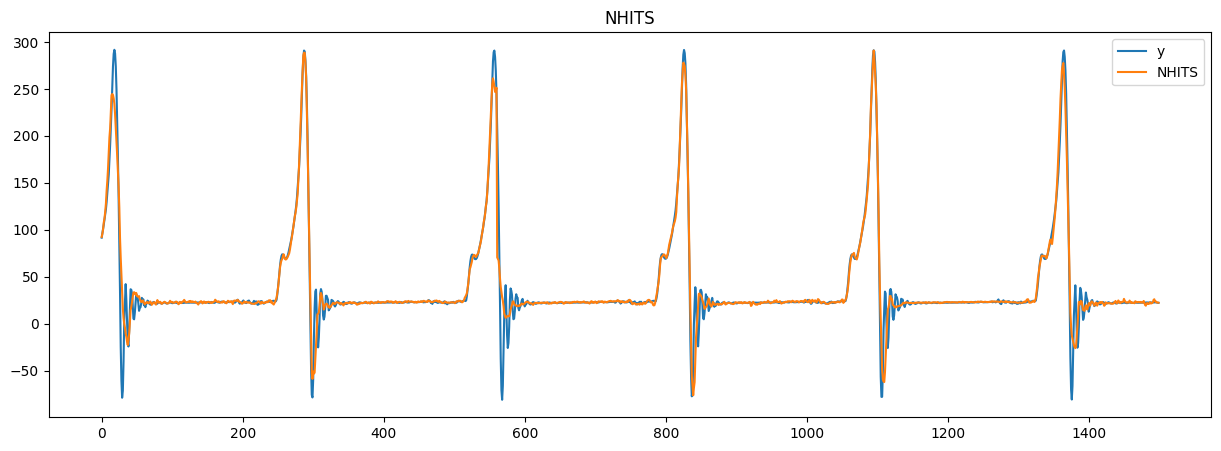

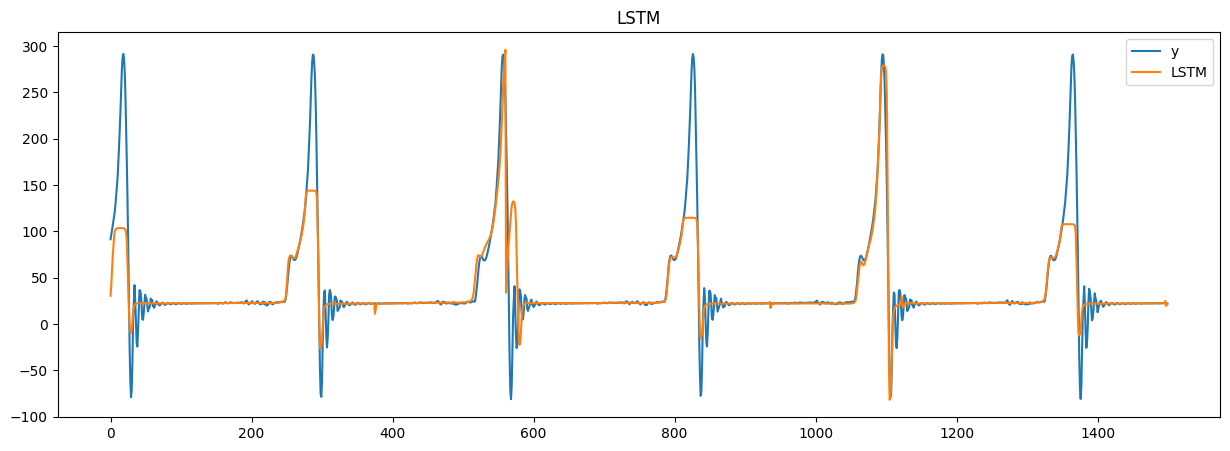

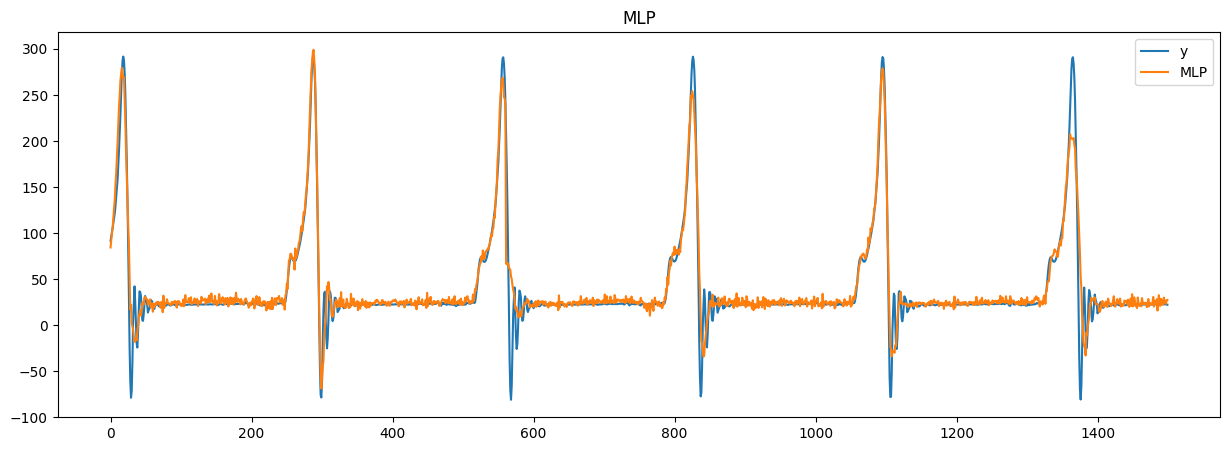

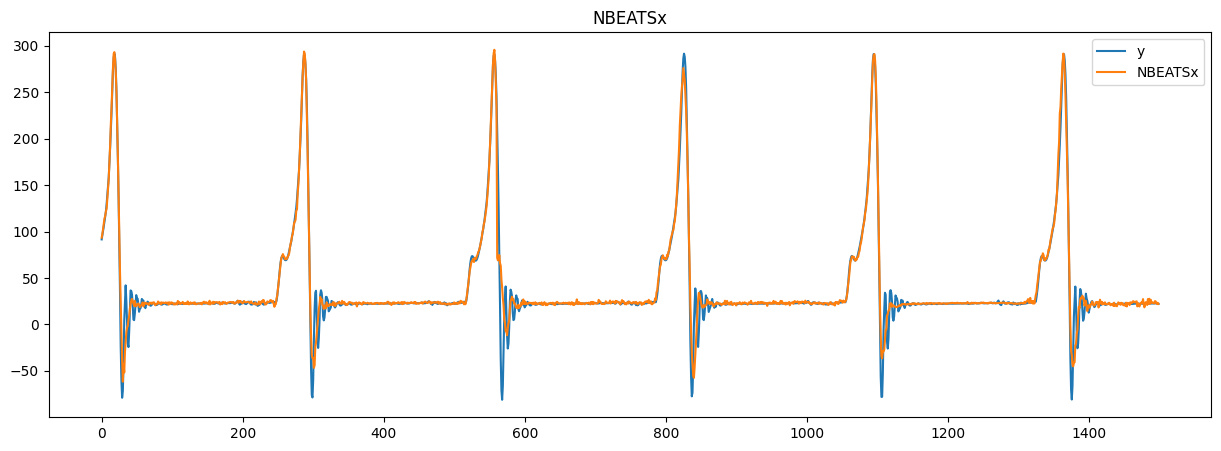

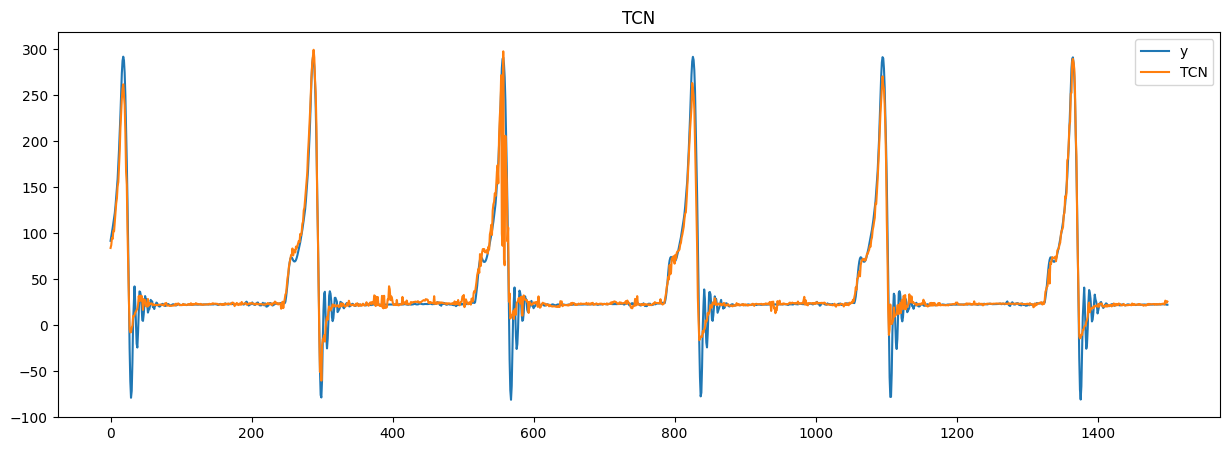

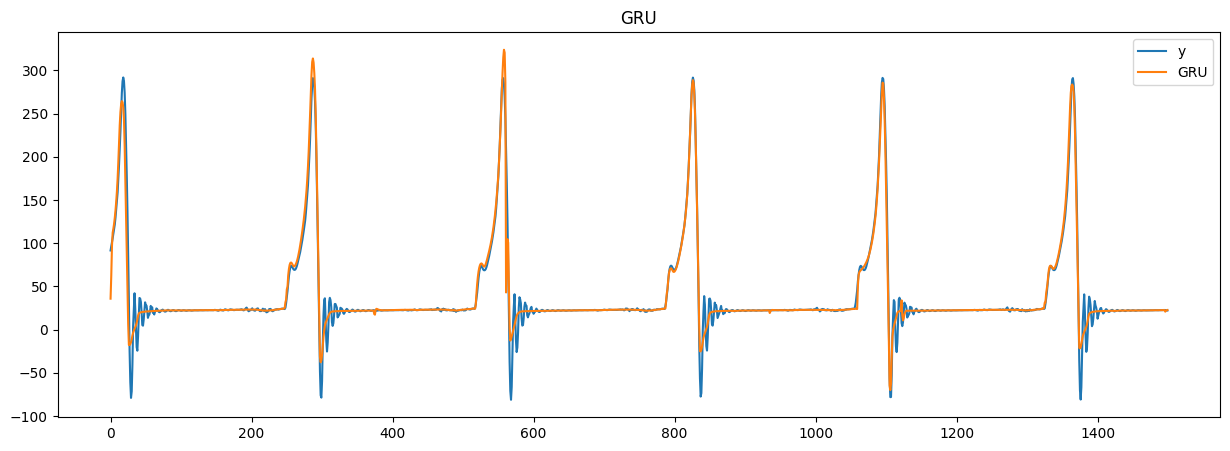

In [ ]:
for column in model_outputs_columns[1:]:
    original_scale_df[['y', column]].plot(figsize=(15, 5), title=column);

In [ ]:
# True values
y_true = original_scale_df['y']

# Predições
predictions = {
    'NHITS': original_scale_df['NHITS'],
    'LSTM': original_scale_df['LSTM'],
    'MLP': original_scale_df['MLP'],
    'NBEATSx': original_scale_df['NBEATSx'],
    'TCN': original_scale_df['TCN'],
    'GRU': original_scale_df['GRU']
}

# Calcular métricas para cada modelo
metrics = []
for model_name, y_pred in predictions.items():
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    metrics.append({
        'Model': model_name,
        'MAE': round(mae, 4),
        'RMSE': round(rmse, 4),
        'R²': round(r2, 4)
    })

metrics_df = pd.DataFrame(metrics).set_index('Model')
print(metrics_df)

            MAE     RMSE      R²
Model                           
NHITS    4.8465  14.0188  0.9360
LSTM     9.7850  30.3149  0.7007
MLP      7.4313  17.0047  0.9058
NBEATSx  4.2174  12.0437  0.9528
TCN      5.8132  15.7710  0.9190
GRU      4.3912  11.8868  0.9540
